In [4]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.decomposition import FastICA
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

df.shape

(1300, 9)

In [ ]:
# Import the class
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/ye/opt/anaconda3/lib/python3.9/site-packages/skl

time for running the algorithm = 0.13703372400050284 s


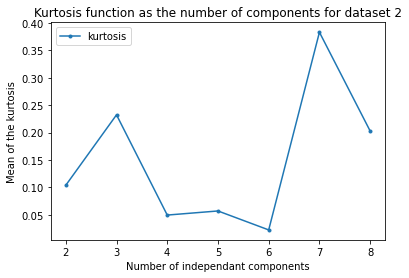

In [12]:
from scipy.stats import kurtosis
import statistics

list_kurtosis = []

time1 = time.perf_counter()

for i in range(2,9):
    ica = FastICA(n_components = i, random_state = 42)
    X_ica = ica.fit_transform(X_scaled)
    kurt = np.abs(statistics.mean(kurtosis(X_ica)))
    list_kurtosis.append(kurt)
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_components = [i for i in range(2,9)]
fig, ax = plt.subplots()
ax.set_title('Kurtosis function as the number of components for dataset 2')
ax.set_xlabel('Number of independant components')
ax.set_ylabel('Mean of the kurtosis')
ax.plot(number_of_components, list_kurtosis, marker=".", label="kurtosis")
ax.legend()
plt.show()

[-1.20674656 -1.08158612  1.89129492 -1.29011935  1.46698294 -1.19061362
 -1.26868937]


/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


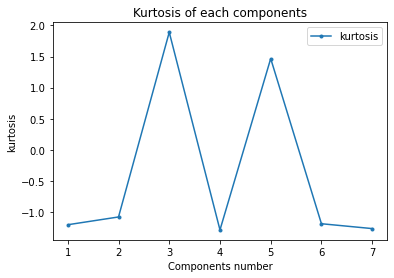

In [11]:
ica = FastICA(n_components = 7, random_state = 42)
X_ica = ica.fit_transform(X_scaled)
kurt1 = kurtosis(X_ica)
print(kurt1)

number_of_components1 = [i for i in range(1,8)]
fig, ax = plt.subplots()
ax.set_title('Kurtosis of each components')
ax.set_xlabel('Components number')
ax.set_ylabel('kurtosis')
ax.plot(number_of_components1, kurt1, marker=".", label="kurtosis")
ax.legend()
plt.show()

In [21]:
ica = FastICA(n_components = 7, random_state = 42)
X_ica = ica.fit_transform(X_scaled)

df_new = pd.DataFrame(X_ica, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7'] )

df_new['Awards'] = df.Awards
df_new = df_new.drop(columns=['PC1'])
df_new = df_new.drop(columns=['PC2'])
df_new = df_new.drop(columns=['PC4'])
df_new = df_new.drop(columns=['PC6'])
df_new = df_new.drop(columns=['PC7'])
df_new.head()

/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


,PC3,PC5,Awards
0,0.010432,0.037707,0
1,0.010750,0.038136,0
2,0.003313,0.004484,0
3,0.009243,0.031710,0
4,-0.017063,0.006504,0


In [22]:
# save the data
df_new.to_csv('Movie_ica.csv', index=False)